In [11]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
from sklearn.preprocessing import LabelEncoder


### 1. 데이터 불러오기

In [12]:
# 데이터 불러오기
df807 = pd.read_parquet('open/train/8.성과정보/201807_train_성과정보.parquet')
df808 = pd.read_parquet('open/train/8.성과정보/201808_train_성과정보.parquet')
df809 = pd.read_parquet('open/train/8.성과정보/201809_train_성과정보.parquet')
df810 = pd.read_parquet('open/train/8.성과정보/201810_train_성과정보.parquet')
df811 = pd.read_parquet('open/train/8.성과정보/201811_train_성과정보.parquet')
df812 = pd.read_parquet('open/train/8.성과정보/201812_train_성과정보.parquet')

df807.head()

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.0,0.0,0.409766,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.0,0.0,-1.010817,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.0,0.0,-0.902166,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.0,0.0,-0.866052,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [13]:
# 8번 데이터 병합
df8 = pd.concat([df807, df808, df809, df810, df811], ignore_index=True)
df8 = df8.sort_values(by=['ID', '기준년월']).reset_index(drop=True)
df8

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.0,0.0,0.409766,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.0,1.044401,1.280543
1,201808,TRAIN_000000,-0.097118,-0.097118,-0.111664,-1.999996,0.0,0.0,0.0,0.192771,...,0.999998,0.595262,1.000661,0.999998,0.999998,-0.140747,-0.117855,0.0,1.185349,1.555697
2,201809,TRAIN_000000,0.015812,0.015812,0.015812,0.000000,0.0,0.0,0.0,0.250439,...,0.999998,1.048667,1.000722,0.999998,0.999998,-0.057002,0.052830,0.0,0.879170,1.407221
3,201810,TRAIN_000000,-0.057331,-0.057331,-0.057331,0.000000,0.0,0.0,0.0,0.222441,...,0.999998,0.595453,1.000911,0.999998,0.999998,-0.083067,0.044567,0.0,0.940814,1.587244
4,201811,TRAIN_000000,-0.036637,-0.036637,-0.036637,0.000000,0.0,0.0,0.0,0.244218,...,0.999998,0.593415,1.000995,0.999998,0.999998,-0.038451,0.082848,0.0,0.937722,1.478965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,201807,TRAIN_399999,1.999996,1.999996,1.999996,1.999996,0.0,0.0,0.0,2.001371,...,0.999998,0.765724,0.999998,0.999998,0.999998,0.066848,1.999996,0.0,0.000000,0.000000
1999996,201808,TRAIN_399999,0.048231,0.048231,0.062418,-1.999996,0.0,0.0,0.0,-1.999702,...,0.999998,0.774913,0.999998,0.999998,0.999998,0.002990,0.163849,0.0,0.000000,0.000000
1999997,201809,TRAIN_399999,0.063319,0.063319,0.063319,0.000000,0.0,0.0,0.0,0.287509,...,0.999998,0.770337,0.999998,0.999998,0.999998,-0.040103,0.085437,0.0,0.000000,0.000000
1999998,201810,TRAIN_399999,0.028755,0.028755,0.021574,-1.999996,0.0,0.0,0.0,-1.998637,...,0.999998,0.590594,0.999998,0.999998,0.999998,-0.118429,-0.047272,0.0,0.000000,0.000000


In [14]:
# segment 데이터 불러오기
segment = pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
segment_col = segment[['ID', 'Segment']]

In [15]:
# segment left outer join
df8 = df8.merge(segment_col, on='ID', how='left')
df8.head()

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.0,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.0,1.044401,1.280543,D
1,201808,TRAIN_000000,-0.097118,-0.097118,-0.111664,-1.999996,0.0,0.0,0.0,0.192771,...,0.595262,1.000661,0.999998,0.999998,-0.140747,-0.117855,0.0,1.185349,1.555697,D
2,201809,TRAIN_000000,0.015812,0.015812,0.015812,0.000000,0.0,0.0,0.0,0.250439,...,1.048667,1.000722,0.999998,0.999998,-0.057002,0.052830,0.0,0.879170,1.407221,D
3,201810,TRAIN_000000,-0.057331,-0.057331,-0.057331,0.000000,0.0,0.0,0.0,0.222441,...,0.595453,1.000911,0.999998,0.999998,-0.083067,0.044567,0.0,0.940814,1.587244,D
4,201811,TRAIN_000000,-0.036637,-0.036637,-0.036637,0.000000,0.0,0.0,0.0,0.244218,...,0.593415,1.000995,0.999998,0.999998,-0.038451,0.082848,0.0,0.937722,1.478965,D


### 2. 데이터 정보 확인하기

In [16]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 50 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int64  
 1   ID                  object 
 2   증감율_이용건수_신용_전월      float64
 3   증감율_이용건수_신판_전월      float64
 4   증감율_이용건수_일시불_전월     float64
 5   증감율_이용건수_할부_전월      float64
 6   증감율_이용건수_CA_전월      float64
 7   증감율_이용건수_체크_전월      float64
 8   증감율_이용건수_카드론_전월     float64
 9   증감율_이용금액_신용_전월      float64
 10  증감율_이용금액_신판_전월      float64
 11  증감율_이용금액_일시불_전월     float64
 12  증감율_이용금액_할부_전월      float64
 13  증감율_이용금액_CA_전월      float64
 14  증감율_이용금액_체크_전월      float64
 15  증감율_이용금액_카드론_전월     float64
 16  증감율_이용건수_신용_분기      float64
 17  증감율_이용건수_신판_분기      float64
 18  증감율_이용건수_일시불_분기     float64
 19  증감율_이용건수_할부_분기      float64
 20  증감율_이용건수_CA_분기      float64
 21  증감율_이용건수_체크_분기      float64
 22  증감율_이용건수_카드론_분기     float64
 23  증감율_이용금액_신용_분기      float64
 24  증감율_이용금액_신판_분기      floa

In [17]:
# 결측치 확인
print(df8.isnull().sum())

# 혜택수혜율_R3M: 402413
# 혜택수혜율_B0M: 461100

기준년월                       0
ID                         0
증감율_이용건수_신용_전월             0
증감율_이용건수_신판_전월             0
증감율_이용건수_일시불_전월            0
증감율_이용건수_할부_전월             0
증감율_이용건수_CA_전월             0
증감율_이용건수_체크_전월             0
증감율_이용건수_카드론_전월            0
증감율_이용금액_신용_전월             0
증감율_이용금액_신판_전월             0
증감율_이용금액_일시불_전월            0
증감율_이용금액_할부_전월             0
증감율_이용금액_CA_전월             0
증감율_이용금액_체크_전월             0
증감율_이용금액_카드론_전월            0
증감율_이용건수_신용_분기             0
증감율_이용건수_신판_분기             0
증감율_이용건수_일시불_분기            0
증감율_이용건수_할부_분기             0
증감율_이용건수_CA_분기             0
증감율_이용건수_체크_분기             0
증감율_이용건수_카드론_분기            0
증감율_이용금액_신용_분기             0
증감율_이용금액_신판_분기             0
증감율_이용금액_일시불_분기            0
증감율_이용금액_할부_분기             0
증감율_이용금액_CA_분기             0
증감율_이용금액_체크_분기             0
증감율_이용금액_카드론_분기            0
잔액_신판평균한도소진율_r6m           0
잔액_신판최대한도소진율_r6m           0
잔액_신판평균한도소진율_r3m           0
잔액_신판최대한도소진율_r3m           0
잔액_신판ca평균한도소진율

### 3. 결측치 처리
- 제거할 것인지(결측치가 있는 행 또는 열 제거) 혹은 대체할 것인지?
- 혜택수혜율 결측치가 큰 이유 예상
    - 고객이 특정기간 동안 카드 사용이나 기타 금융 활동이 없어서 혜택을 받을 기회 자체가 없었을 수 있음.
    - 그렇다면 0 값으로 채울 수 있음. 
- 장점: 해당 컬럼의 결측치 정보를 잃지 않고 유의미한 값으로 채울 수 있고, 모델이 혜택을 받지 못한 경우를 0이라는 값으로 학습할 수 있음.
- 주의: 만약 결측치가 실제로는 알 수 없는 값인데 억지로 0으로 채우는 것이라면 데이터 분포를 왜곡하고 모델 학습에 편향을 줄 수 있으나 **혜택수혜율의 맥락에서는 0이 합리적인 경우가 많음**.

In [22]:
na_mask = df8['혜택수혜율_R3M'].isna() | df8['혜택수혜율_B0M'].isna()
df_na_subset = df8[na_mask][['혜택수혜율_R3M', '혜택수혜율_B0M']]
print(df_na_subset)
print(f"\n총 {len(df_na_subset)}개의 행에서 NA가 발견되었습니다 (둘 중 하나라도 NA인 경우).")

         혜택수혜율_R3M  혜택수혜율_B0M
20             NaN        NaN
21             NaN        NaN
22             NaN        0.0
23             NaN        NaN
24             NaN        NaN
...            ...        ...
1999990        NaN        NaN
1999991        NaN        NaN
1999992        NaN        NaN
1999993        NaN        NaN
1999994        NaN        NaN

[461151 rows x 2 columns]

총 461151개의 행에서 NA가 발견되었습니다 (둘 중 하나라도 NA인 경우).


- 왜 NA를 0으로 채우는 것이 합리적인가? (Gemini)
    - 혜택수혜율 = (수혜받은 혜택 양 / 총 가능한 혜택 양 또는 총 활동량) * 100
    - 만약 어떤 고객이 특정 기간 동안 카드 사용이나 금융 활동이 전혀 없어서 혜택을 받을 기회 자체가 없었다면, 이 고객의 혜택수혜율은 본질적으로 **0%**라고 해석하는 것이 맞습니다. 데이터베이스에 '혜택 활동 없음'에 대한 명시적인 0이라는 기록이 남지 않고 NA로 처리되었을 가능성이 높습니다
    - NA의 의미 해석: 이 경우 NA는 "측정되지 않았거나 알 수 없는 값"이 아니라, "활동이 없었으므로 혜택수혜율이 0이다"라는 특정 의미를 내포하게 됩니다.

- 0과의 일관성: 이미 데이터에 0%의 혜택수혜율을 가진 고객들이 존재할 것입니다. 이 고객들은 활동은 있었으나 혜택을 받지 못했거나, 활동량이 너무 적어 비율이 0에 수렴했을 수 있습니다. 만약 활동이 없어서 NA인 고객들을 0으로 채운다면, '혜택을 받지 못한 모든 경우'를 0으로 통일하여 모델이 일관되게 학습할 수 있게 됩니다.

In [25]:
df8['혜택수혜율_R3M'].fillna(0, inplace=True)
df8['혜택수혜율_B0M'].fillna(0, inplace=True)
print(df8[['혜택수혜율_R3M', '혜택수혜율_B0M']].isnull().sum())

혜택수혜율_R3M    0
혜택수혜율_B0M    0
dtype: int64


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_18192\789177820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df8['혜택수혜율_R3M'].fillna(0, inplace=True)
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_18192\789177820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### 4. 원핫인코딩

In [31]:
# df8의 'Segment' 컬럼에 원-핫 인코딩 적용
# 새롭게 인코딩된 데이터프레임을 df_encoded에 저장합니다.
# 원본 'Segment' 컬럼은 제거되고, 새로운 더미 컬럼들이 생성됩니다.
# drop_first=False로 설정하여 모든 Segment 더미 컬럼이 생성되도록 했습니다.
df_encoded = pd.get_dummies(df8, columns=['Segment'], prefix='Segment', drop_first=False)

# --- 새로 추가된 부분 ---
# 'Segment_'로 시작하는 모든 컬럼을 찾아서 리스트에 저장
# 이 리스트가 for 루프에서 사용될 변수입니다.
segment_dummies = [col for col in df_encoded.columns if col.startswith('Segment_')]
# ----------------------

# 해당 컬럼들을 정수형(0 또는 1)으로 변환
for col in segment_dummies:
    # df_encoded[col].dtype == bool 조건은 pd.get_dummies의 기본 동작이 0/1이므로
    # 보통 False일 가능성이 높습니다. 하지만 안전을 위해 유지합니다.
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)

# 변환 후 결과 확인 (선택 사항)
print("--- 'Segment' 더미 컬럼들의 변환 후 head() ---")
print(df_encoded[segment_dummies].head())


--- 'Segment' 더미 컬럼들의 변환 후 head() ---
   Segment_A  Segment_B  Segment_C  Segment_D  Segment_E
0          0          0          0          1          0
1          0          0          0          1          0
2          0          0          0          1          0
3          0          0          0          1          0
4          0          0          0          1          0


### 5. 이상치 탐색

--- 각 수치형 컬럼별 이상치(Outliers) 개수 확인 (IQR 방식) ---
'증감율_이용건수_신용_전월': 347290개의 이상치 발견
'증감율_이용건수_신판_전월': 348023개의 이상치 발견
'증감율_이용건수_일시불_전월': 349575개의 이상치 발견
'증감율_이용건수_할부_전월': 186369개의 이상치 발견
'증감율_이용건수_CA_전월': 19490개의 이상치 발견
'증감율_이용건수_체크_전월': 290076개의 이상치 발견
'증감율_이용건수_카드론_전월': 2759개의 이상치 발견
'증감율_이용금액_신용_전월': 179345개의 이상치 발견
'증감율_이용금액_신판_전월': 178504개의 이상치 발견
'증감율_이용금액_일시불_전월': 159221개의 이상치 발견
'증감율_이용금액_할부_전월': 291029개의 이상치 발견
'증감율_이용금액_CA_전월': 59553개의 이상치 발견
'증감율_이용금액_체크_전월': 268125개의 이상치 발견
'증감율_이용금액_카드론_전월': 2892개의 이상치 발견
'증감율_이용건수_신용_분기': 296693개의 이상치 발견
'증감율_이용건수_신판_분기': 296758개의 이상치 발견
'증감율_이용건수_일시불_분기': 294312개의 이상치 발견
'증감율_이용건수_할부_분기': 534524개의 이상치 발견
'증감율_이용건수_CA_분기': 118280개의 이상치 발견
'증감율_이용건수_체크_분기': 354653개의 이상치 발견
'증감율_이용건수_카드론_분기': 49526개의 이상치 발견
'증감율_이용금액_신용_분기': 277157개의 이상치 발견
'증감율_이용금액_신판_분기': 279132개의 이상치 발견
'증감율_이용금액_일시불_분기': 281384개의 이상치 발견
'증감율_이용금액_할부_분기': 653312개의 이상치 발견
'증감율_이용금액_CA_분기': 177368개의 이상치 발견
'증감율_이용금액_체크_분기': 355489개의 이상치 발견
'증감율_이용금액_카드론_분기': 50498개의 이상치 발견
'

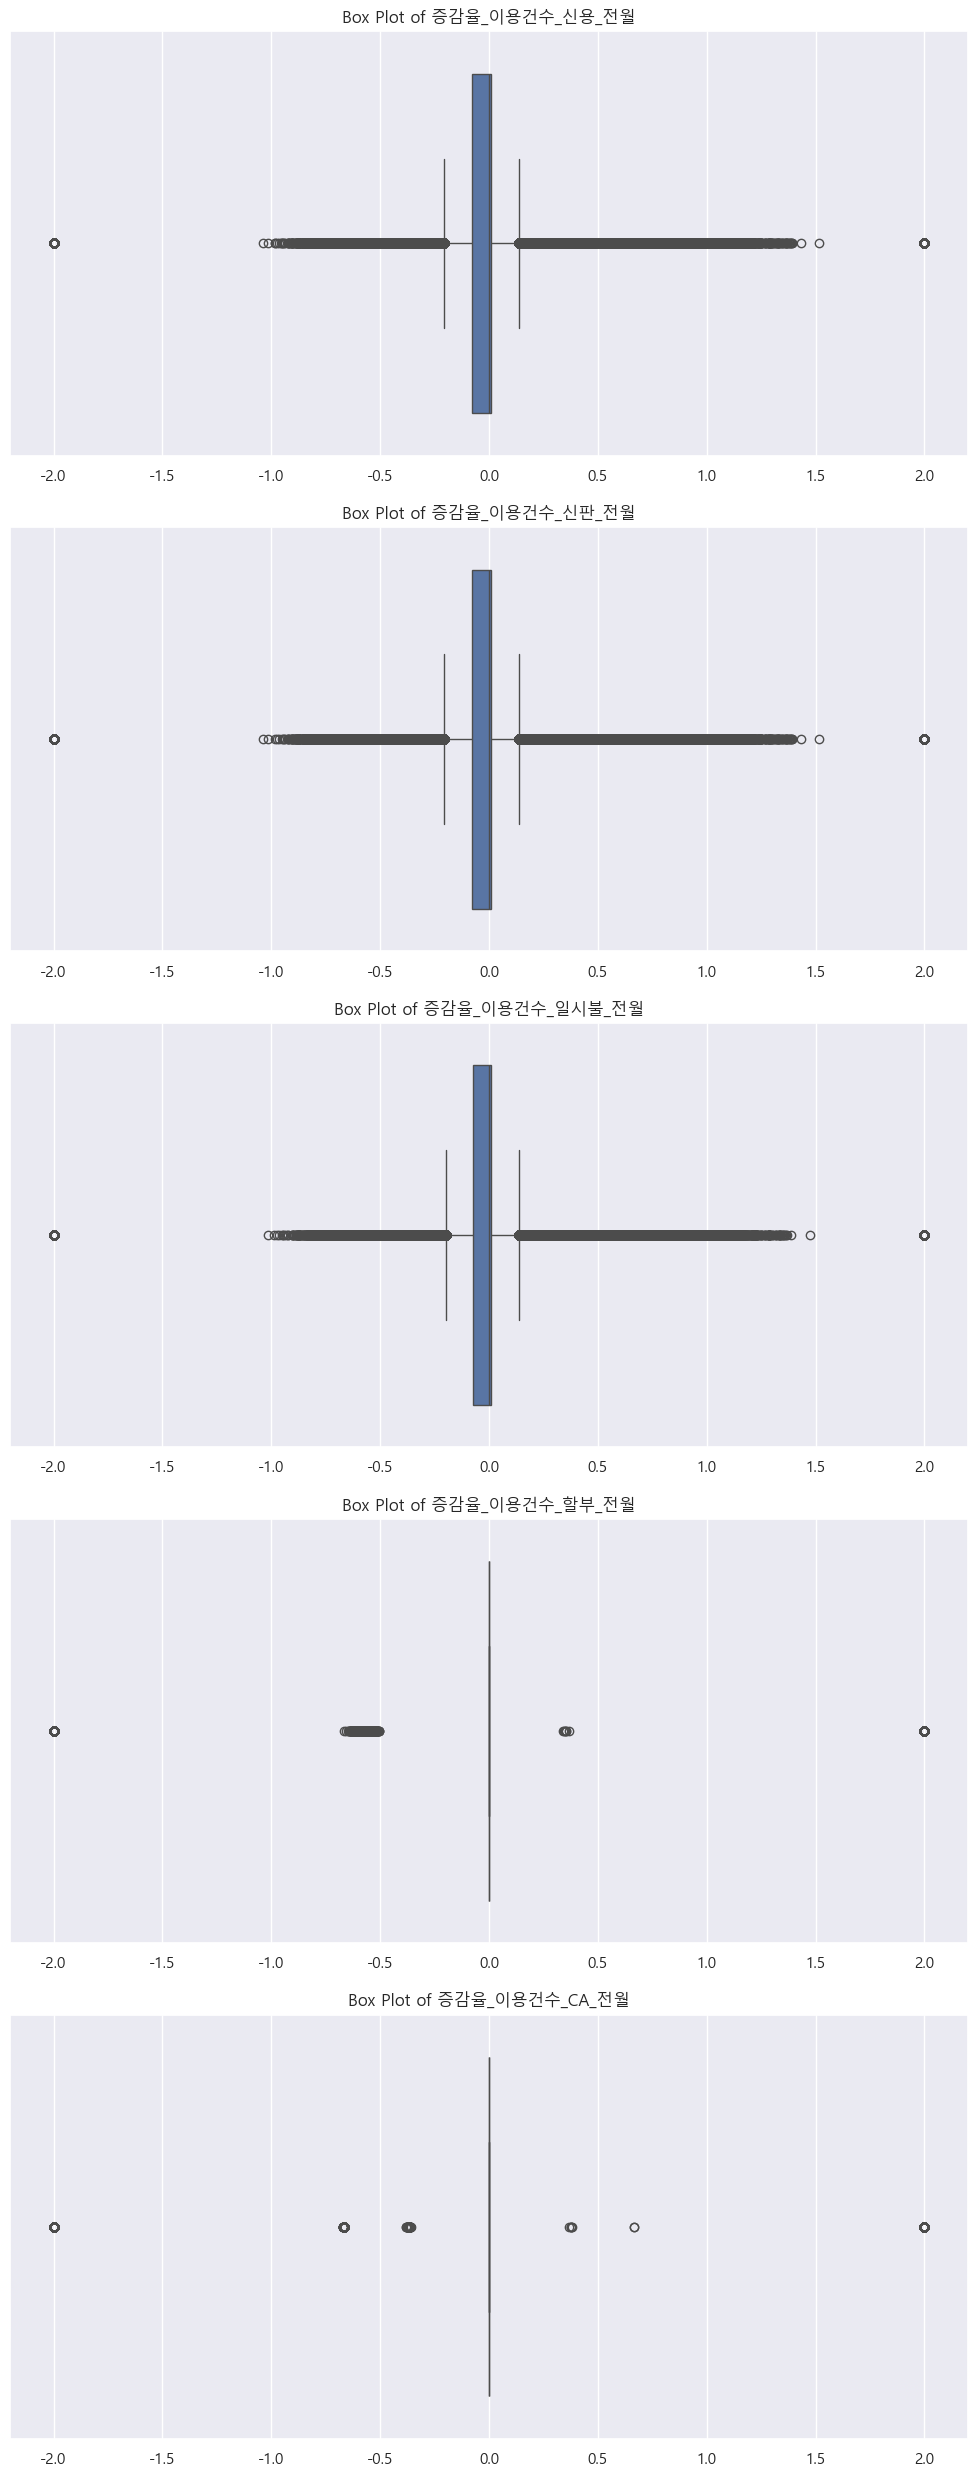

In [32]:
# df_encoded는 Segment 컬럼이 원-핫 인코딩된 최종 데이터프레임입니다.

print("--- 각 수치형 컬럼별 이상치(Outliers) 개수 확인 (IQR 방식) ---")

# 이상치 확인에서 제외할 컬럼 목록 (ID, 더미 변수 등)
# ID는 식별자이므로 이상치 분석 대상이 아님
# 원-핫 인코딩된 Segment 컬럼(0 또는 1)도 이상치 분석 대상이 아님
# 기준년월도 일반적으로 이상치 분석 대상이 아닙니다.
exclude_cols = ['ID', '기준년월'] + [col for col in df_encoded.columns if col.startswith('Segment_')]

# 수치형 컬럼만 선택 (float64, int64 등)
# 제외할 컬럼은 빼고, 수치형인 컬럼들만 선택합니다.
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# 각 수치형 컬럼별 이상치 개수 계산
outlier_counts = {}
for col in numerical_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 이상치 기준 (Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 경우)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 개수 계산
    outliers = df_encoded[(df_encoded[col] < lower_bound) | (df_encoded[col] > upper_bound)]
    outlier_count = len(outliers)
    
    outlier_counts[col] = outlier_count
    
    if outlier_count > 0:
        print(f"'{col}': {outlier_count}개의 이상치 발견")
    # else: # 이상치가 없는 컬럼도 보고 싶다면 주석 해제
    #     print(f"'{col}': 이상치 없음")

print("\n--- 이상치가 발견된 컬럼 요약 ---")
for col, count in outlier_counts.items():
    if count > 0:
        print(f"'{col}': {count}개")

print("\n--- 각 수치형 컬럼별 Box Plot 시각화 (선택 사항) ---")
# Box Plot으로 이상치를 시각적으로 확인합니다.
# 컬럼이 많으면 개별적으로 보거나, 중요하다고 생각되는 컬럼만 선택해서 보는 것이 좋습니다.
# 모든 컬럼을 한 번에 그리면 너무 많아서 알아보기 힘들 수 있습니다.

# 몇 개의 주요 컬럼만 예시로 시각화 (실제 데이터에 맞게 조정 필요)
# 예를 들어, 아까 언급된 '증감율_이용건수_신용_전월'이나, 타겟 변수 등 중요하다고 생각되는 컬럼 선택
# 시각화할 컬럼 리스트 (모든 numerical_cols를 그리면 매우 많아집니다.)
cols_to_plot = numerical_cols[:5] # 처음 5개 컬럼만 시각화 (또는 수동으로 지정)

if cols_to_plot: # 시각화할 컬럼이 있을 경우에만 실행
    num_plots = len(cols_to_plot)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
    
    # axes가 단일 객체일 수 있으므로 리스트 형태로 감싸줌
    if num_plots == 1:
        axes = [axes]

    for i, col in enumerate(cols_to_plot):
        sns.boxplot(x=df_encoded[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('') # x축 라벨 제거 (깔끔하게)
    
    plt.tight_layout() # 그래프 간 간격 자동 조절
    plt.show()
else:
    print("시각화할 수치형 컬럼이 없습니다.")